<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Nu

c:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


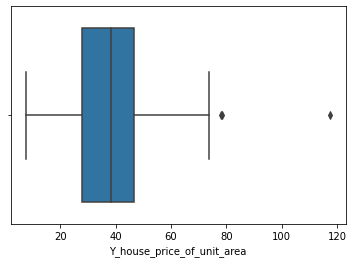

,No,X1_transaction_date,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area,group
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,Group 3
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,Group 2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,Group 2
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,Group 2
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,Group 1
...,...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,Group 2
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,Group 1
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,Group 2
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,Group 1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"c:\Users\Acer\Desktop\dmv and ml\DMV_praticals\Datasets\Real estate.csv")
df.info()
df.describe()

df.head()
df.isnull().sum()
df.columns

columns = list(df.columns)
columns

columns = [col.replace(' ', '_') for col in columns]
columns
df.head()

df.columns = columns
df.head()
df.info()


start_date = 2012.917
end_date = 2015.813

filtered_data = df[(df['X1_transaction_date'] >= start_date) & (df['X1_transaction_date'] <= end_date)]
filtered_data


house_age = 20
filtered_data = df[(df['X2_house_age'])> house_age]  
filtered_data

df

df_sorted_age = df.sort_values(by='X2_house_age')
df_sorted_age

def assign_group(row):
    if row['X2_house_age'] <= 10:
        return 'Group 1'
    elif row['X2_house_age'] <= 20:
        return 'Group 2'
    else:
        return 'Group 3'

df['group'] = df.apply(assign_group, axis=1)

df.head()

average_price_by_group = df.groupby('group')['Y_house_price_of_unit_area'].mean()
print(average_price_by_group)

import numpy as np
import seaborn as sns
q1 = np.percentile(df['Y_house_price_of_unit_area'], 25)
q3 = np.percentile(df['Y_house_price_of_unit_area'], 75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

sns.boxplot(df['Y_house_price_of_unit_area'])
plt.show()

filtered_data_price = df[(df['Y_house_price_of_unit_area'] >= lower_bound) & 
                           (df['Y_house_price_of_unit_area'] <= upper_bound)]

filtered_data_price
 

